In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f1 = lambda x: 2*x - 2
f2 = lambda x: -(x - 1)/2
f3 = lambda x: -x + 4

In [3]:
A = np.array(([2., -1.], [1., 2.], [1., 1.]))
b = np.array(([2.], [1.], [4.]))

In [4]:
AT = A.T
A_inv = np.linalg.inv(np.matmul(AT, A))
AT

array([[ 2.,  1.,  1.],
       [-1.,  2.,  1.]])

In [5]:
x_vect = np.matmul(A_inv, np.matmul(AT, b))
x_vect

array([[1.42857143],
       [0.42857143]])

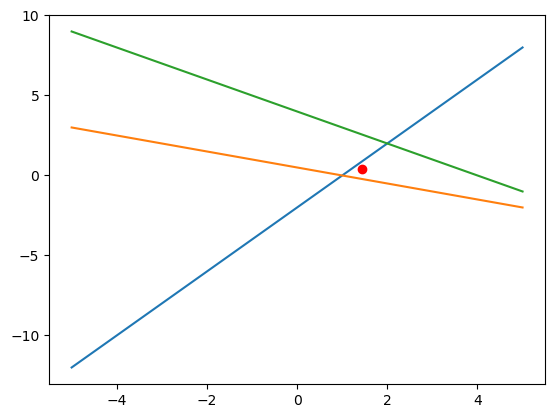

In [6]:
X = np.linspace(-5, 5, 1001)
plt.plot(X, f1(X))
plt.plot(X, f2(X))
plt.plot(X, f3(X))
plt.scatter(x_vect[0][0], x_vect[1][0], color='red')
plt.show()

Aquí podemos observar que el punto encontrado mediante el método de mínimos cuadrados matricial, representa el punto más cercano a las tres rectas (dado que no existe un punto en el cual las tres se intersecten).

In [7]:
Y = np.linspace(-5, 5, 1001)
def findDist(A, x, y, b):
    xy_vect = np.array(([x], [y]))
    dist = np.linalg.norm( np.matmul(A, xy_vect) - b )
                
    return dist            

In [8]:
minimo_dist = np.inf
minimo_vect = np.zeros(2)
Z = np.zeros((len(X), len(Y)))

for i in range(len(X)):
        for j in range(len(Y)):
            dist = findDist(A, X[i], Y[j], b)
            Z[i][j] = dist
            if dist < minimo_dist:
                minimo_dist = dist
                minimo_vect[0] = X[i]
                minimo_vect[1] = Y[j]
                
minimo_vect

array([1.43, 0.43])

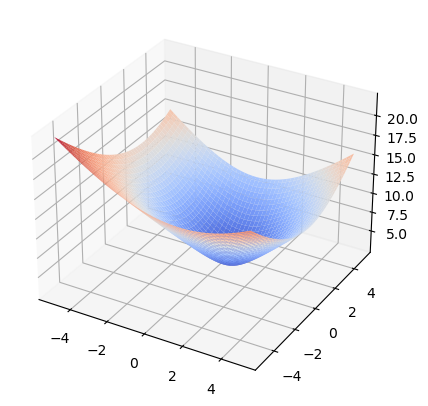

In [9]:
Xm, Ym = np.meshgrid(X,Y)

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xm,Ym,Z,cmap='coolwarm')